# Setup

In [18]:
project_dir = "/hps/research1/birney/users/ian/mikk_paper/mikk_genome"
#project_dir = "/Users/brettell/Documents/Repositories/mikk_genome"

"/hps/research1/birney/users/ian/mikk_paper/mikk_genome"

In [30]:
using Pkg; Pkg.activate(project_dir); Pkg.instantiate()

 Activating environment at `/hps/research1/birney/users/ian/mikk_paper/mikk_genome/Project.toml`


In [8]:
using Pkg; Pkg.add("Queryverse")

  Resolving package versions...
No Changes to `/hps/research1/birney/users/ian/mikk_paper/mikk_genome/Project.toml`
No Changes to `/hps/research1/birney/users/ian/mikk_paper/mikk_genome/Manifest.toml`


In [31]:
using Glob, DataFrames, StatsPlots, Interact, CSV, Gadfly

## Get files

In [21]:
data_dir = joinpath(project_dir, "data/sv_analysis/20210217_sviper_filter_pass")

"/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass"

In [22]:
in_files = Glob.glob("*.csv", data_dir)

9-element Array{String,1}:
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/11-1.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/117-2.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/131-1.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/134-1.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/134-2.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/69-1.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/7-1.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/20210217_sviper_filter_pass/79-2.csv"
 "/hps/research1/birney/users/ian/mikk_paper/mikk_genome/data/sv_analysis/

In [23]:
# Read in files and bind into single DF
dfs = []
for file in in_files
    sample = replace(basename(file), ".csv" => "")
    df = DataFrame(CSV.File(file, header = ["CHROM", "POS", "ALT", "SVLEN", "SVTYPE", "CHR2", "END","GT","LN","ST"]))
    df[:SAMPLE] = sample
    push!(dfs, df)
end

full_df = reduce(vcat, dfs)

,CHROM,POS,ALT,SVLEN,SVTYPE,CHR2,END,GT,LN
,String,Int64,String,Int64,String,String,Int64,String,Int64
1,1,6774,N[14:2961345[,0,TRA,14,2961345,0/0,1
2,1,9516,N[14:2964594[,0,TRA,14,2964594,0/0,1
3,1,14623,]17:2155290]N,0,TRA,17,2155290,0/0,1
4,1,15555,N[11:20369783[,0,TRA,11,20369783,0/0,1
5,1,15555,N[22:24120451[,0,TRA,22,24120451,0/0,1
6,1,15558,N[22:26742061[,0,TRA,22,26742061,0/0,1
7,1,15358,N[10:27116796[,0,TRA,10,27116796,0/0,1
8,1,15554,N[3:29541650[,0,TRA,3,29541650,0/0,1
9,1,15551,N[3:29596392[,0,TRA,3,29596392,0/0,1


# Plot

## Explore

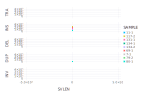

In [24]:
Gadfly.plot(full_df, x = :SVLEN, color = :SAMPLE, ygroup = :SVTYPE,
            Geom.subplot_grid(Geom.histogram))

## Interactive

In [61]:
using Pkg; Pkg.add("WebIO")
using WebIO
WebIO.install_jupyter_nbextension()

  Resolving package versions...
No Changes to `/hps/research1/birney/users/ian/mikk_paper/mikk_genome/Project.toml`
No Changes to `/hps/research1/birney/users/ian/mikk_paper/mikk_genome/Manifest.toml`
┌ Info: Installing Jupyter WebIO extension...
│   cmd = `/nfs/research1/birney/users/brettell/anaconda3/bin/jupyter nbextension install --user /homes/brettell/.julia/packages/WebIO/Fy9h1/deps/bundles/webio-jupyter-notebook.js`
└ @ WebIO /homes/brettell/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:237
Up to date: /homes/brettell/.local/share/jupyter/nbextensions/webio-jupyter-notebook.js

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable <the entry point> --user
    
┌ Info: Enabling Jupyter WebIO extension...
│   cmd = `/nfs/research1/birney/users/brettell/anaconda3/bin/jupyter nbextension enable --user webio-jupyter-notebook`
└ @ WebIO /homes/brettell/.julia/packages/WebIO/Fy9h1/deps/jupyter.jl:241
Ena

In [62]:
using Interact
ui = button()
display(ui)

(div { className="field interact-widget" }
    (button { attributes=Dict{Any,Any}("data-bind" => "click: function (){this.clicks(this.clicks()+1)}, css: {'is-loading' : loading}") className="is-medium button is-primary" style=Dict{String,Any}() }
    "Press me!"))

In [63]:
using Plots

x = y = 0:0.1:30

freqs = OrderedDict(zip(["pi/4", "π/2", "3π/4", "π"], [π/4, π/2, 3π/4, π]))

mp = @manipulate for freq1 in freqs, freq2 in slider(0.01:0.1:4π; label="freq2")
    y = @. sin(freq1*x) * sin(freq2*x)
    Plots.plot(x, y)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["freq1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "pi/4","val" => 1,"id" => "idTeY1nprX"), OrderedDict{String,Any}("key" => "π/2","val" => 2,"id" => "idOw5HUyWN"), OrderedDict{String,Any}("key" => "3π/4","val" => 3,"id" => "idg6NiT5E4"), OrderedDict{String,Any}("key" => "π","val" => 4,"id" => "idushgkj5G")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/homes/brettell/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/homes/brettell/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/homes/brettell/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/homes/brettell/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/homes/brettell/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00002ba1899a5fc0, Task (runnable) @0x00002ba1899a5fc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n  

In [58]:
@manipulate for i in 0:5
    Plots.plot(sin, 0, i*pi)
    end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 5,:min => 0,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
2, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/homes/brettell/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/homes/brettell/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/homes/brettell/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/homes/brettell/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/homes/brettell/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00002ba16a241870, Task (runnable) @0x00002ba16a241870), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"5571405888237876772\",\"id\":\"15075580670875740246\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"5571

In [59]:
unique(full_df[:SVTYPE])

5-element Array{String,1}:
 "TRA"
 "INS"
 "DEL"
 "DUP"
 "INV"

In [ ]:
for sv_type in unique(full_df[:SVTYPE])
    

In [ ]:

Gadfly.plot(full_df, x = :SVLEN, color = :SAMPLE, ygroup = :SVTYPE,
            Geom.subplot_grid(Geom.histogram))